In [10]:
#CSV to df
import pandas as pd

df = pd.read_csv('/Users/yagizebil/Developer/DSA210_yagiz/data/2024-11-13 08-22-58.csv', delimiter=';')

In [11]:
# Ensure the necessary columns are present and correctly formatted
df['VALUE'] = pd.to_numeric(df['VALUE'], errors='coerce')
df['SECONDS'] = pd.to_numeric(df['SECONDS'], errors='coerce')
df['PID'] = df['PID'].astype(str)

# Create an array that stores each PID then create a dictionary that stores each PID and its corresponding values with seconds
PID = df['PID'].unique()
PID_dict = {}
for i in PID:
    PID_dict[i] = pd.Series(df[df['PID'] == i]['VALUE'].values, index=df[df['PID'] == i]['SECONDS'])


Initial DataFrame:
         SECONDS                  PID       VALUE UNITS   LATITUDE  LONGTITUDE  \
0  30189.243321       Altitude (GPS)  185.400009     m  40.913543   29.290902   
1  30189.243321  Average speed (GPS)    0.000000  km/h  40.913543   29.290902   
2  30189.243321          Speed (GPS)    0.000000  km/h  40.913543   29.290902   
3  30189.264321       Altitude (GPS)  185.400009     m  40.913543   29.290902   
4  30189.264321  Average speed (GPS)    0.000000  km/h  40.913543   29.290902   

   Unnamed: 6  
0         NaN  
1         NaN  
2         NaN  
3         NaN  
4         NaN  
Filtered DataFrame:
           SECONDS                                                PID  VALUE  \
108  30198.228321  Fuel economizer (based on fuel system status a...    0.0   
196  30203.801321  Fuel economizer (based on fuel system status a...    1.0   
273  30209.497321  Fuel economizer (based on fuel system status a...    1.0   
373  30215.707321  Fuel economizer (based on fuel system sta

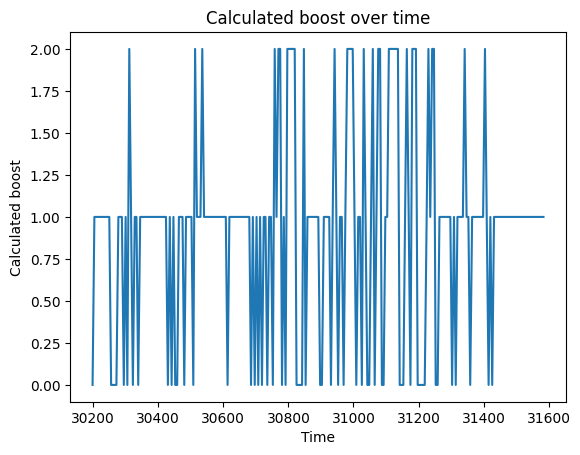

In [12]:
#create a graph for PID = Calculated boost
import matplotlib.pyplot as plt

print("Initial DataFrame:\n", df.head())

df['VALUE'] = pd.to_numeric(df['VALUE'], errors='coerce')
df['SECONDS'] = pd.to_numeric(df['SECONDS'], errors='coerce')
df['PID'] = df['PID'].astype(str)
df['VALUE'] = df['VALUE'].astype(float)
df['SECONDS'] = df['SECONDS'].astype(float)

# Filter for 'Calculated boost'
df = df[df['PID'] == 'Fuel economizer (based on fuel system status and throttle position)']
print("Filtered DataFrame:\n", df.head())

# Plotting
plt.plot(df['SECONDS'], df['VALUE'])
plt.xlabel('Time')
plt.ylabel('Calculated boost')
plt.title('Calculated boost over time')
plt.show()

In [13]:
for i in PID:
    print(i)
print("Count of PID: ", len(PID))   

Altitude (GPS)
Average speed (GPS)
Speed (GPS)
Absolute throttle position B
Absolute pedal position D
OBD Module Voltage
Calculated engine load value
Engine coolant temperature
Short term fuel % trim - Bank 1
Long term fuel % trim - Bank 1
Calculated boost
Intake manifold absolute pressure
Calculated instant fuel rate
Engine RPM
Engine RPM x1000
Instant engine power (based on fuel consumption)
Vehicle acceleration
Vehicle speed
Timing advance
Intake air temperature
Fuel economizer (based on fuel system status and throttle position)
Throttle position
Oxygen sensor 1 Bank 1 Short term fuel trim
Oxygen sensor 1 Bank 1 Voltage
Oxygen sensor 2 Bank 1 Short term fuel trim
Oxygen sensor 2 Bank 1 Voltage
Distance traveled with MIL on
Commanded evaporative purge
# warm-ups since codes cleared
Distance traveled since codes cleared
Catalyst temperature Bank 1 Sensor 1
Catalyst temperature Bank 1 Sensor 2
Control module voltage
Absolute load value
Fuel/Air commanded equivalence ratio
Relative thro

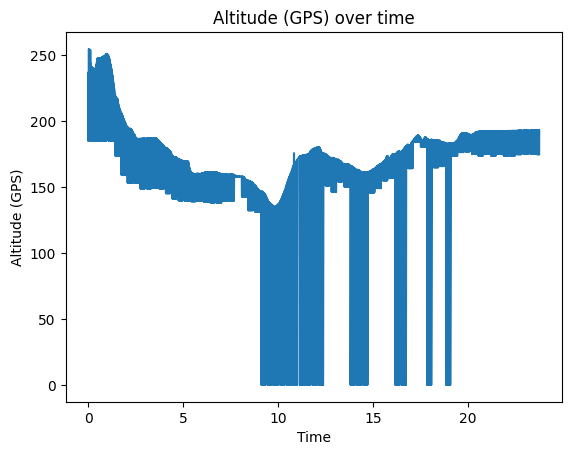

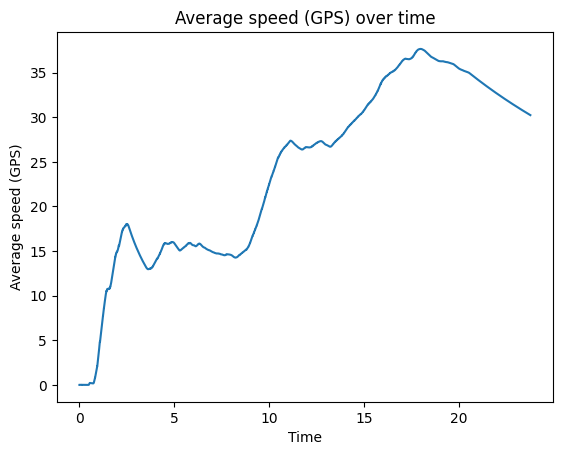

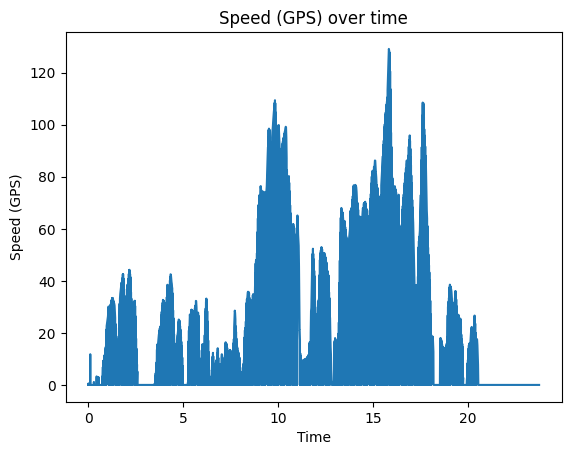

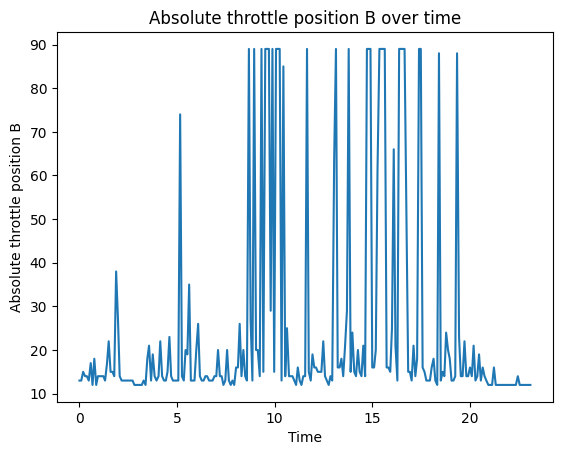

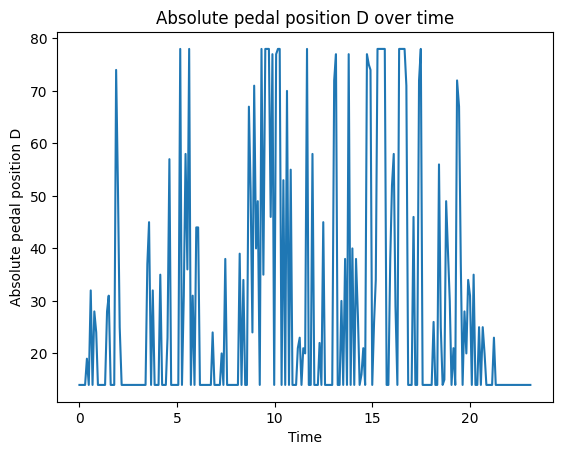

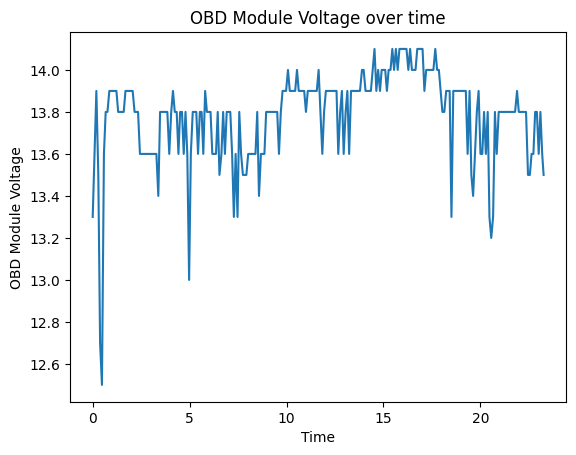

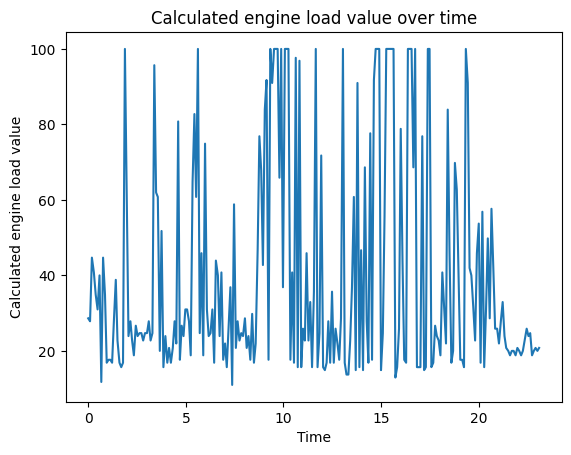

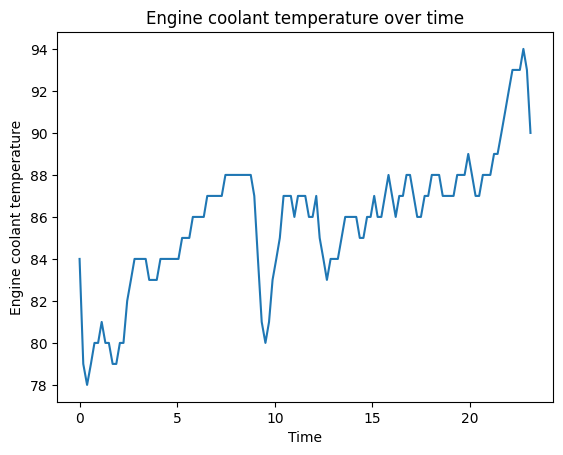

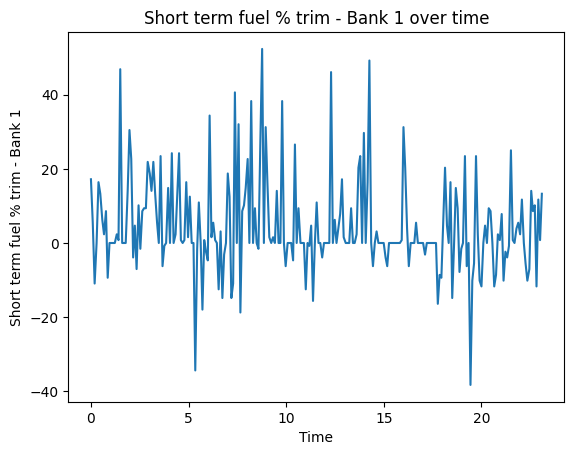

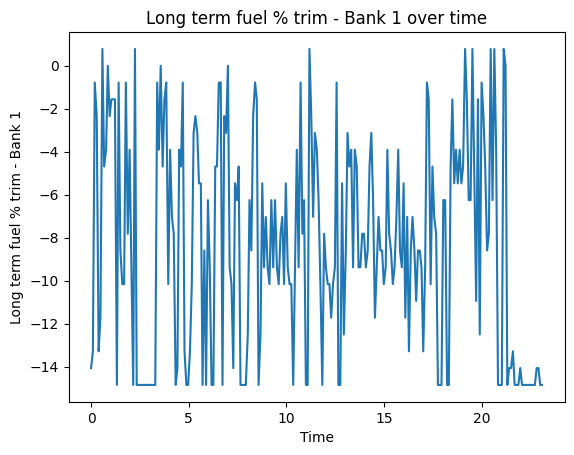

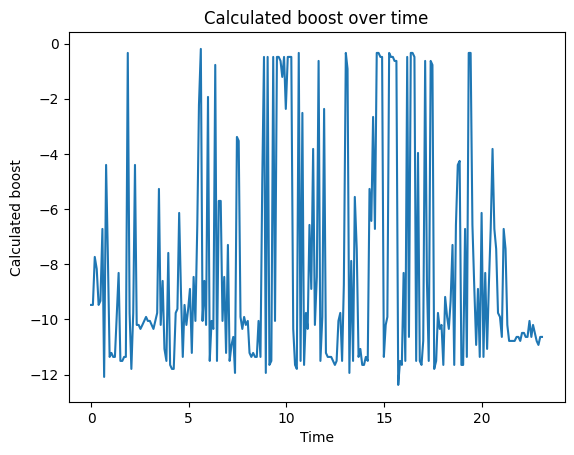

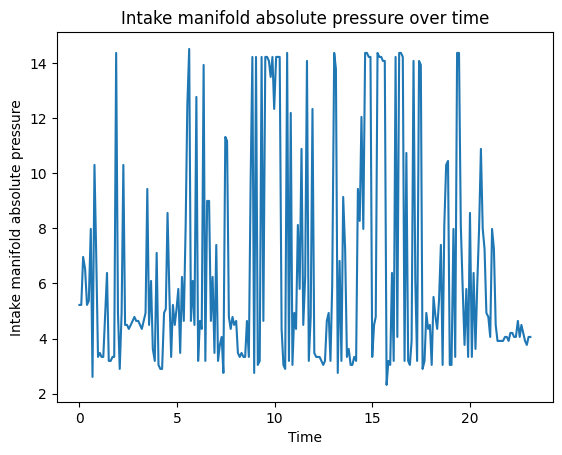

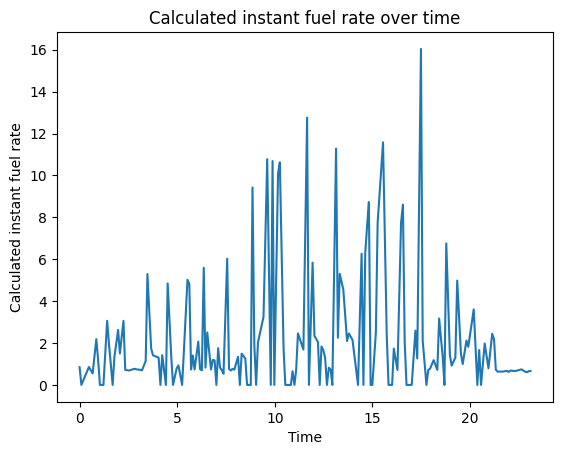

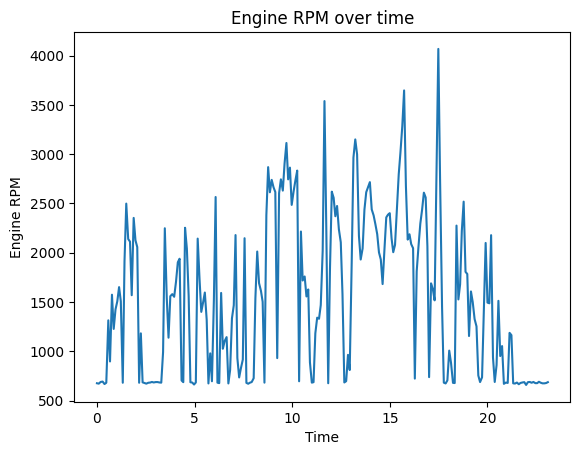

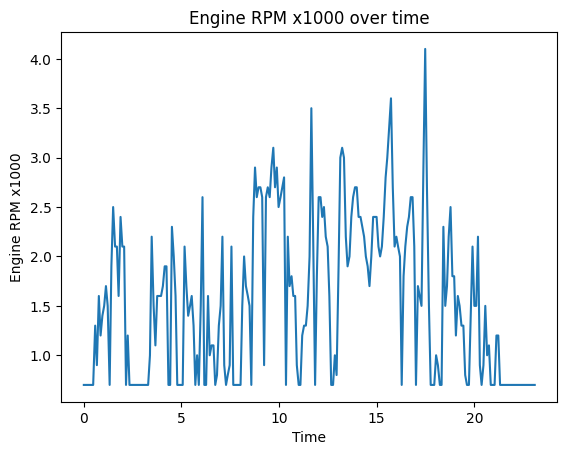

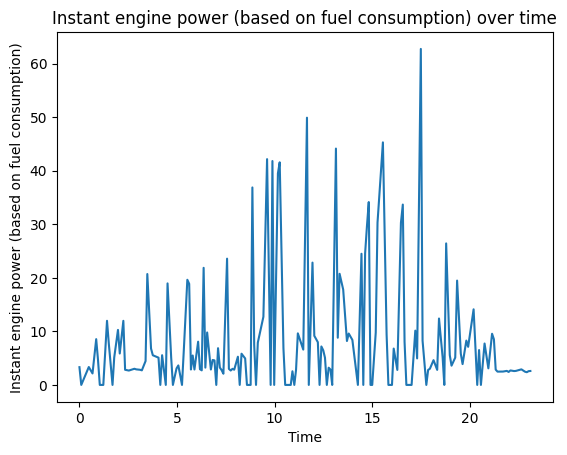

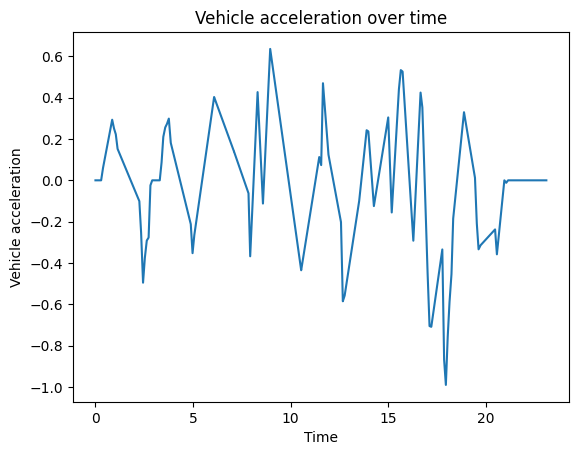

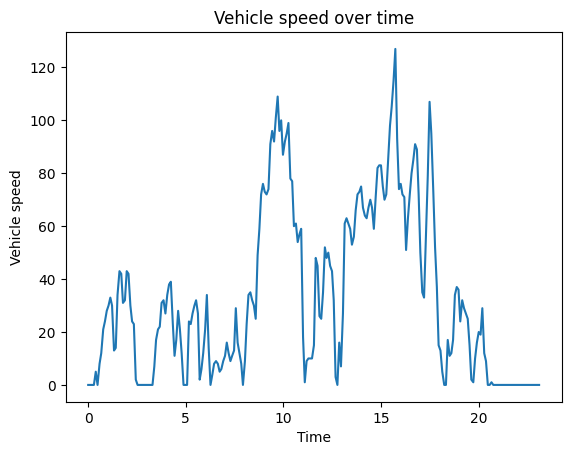

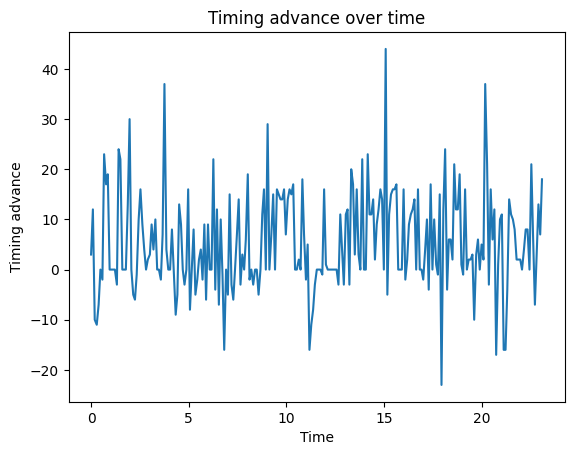

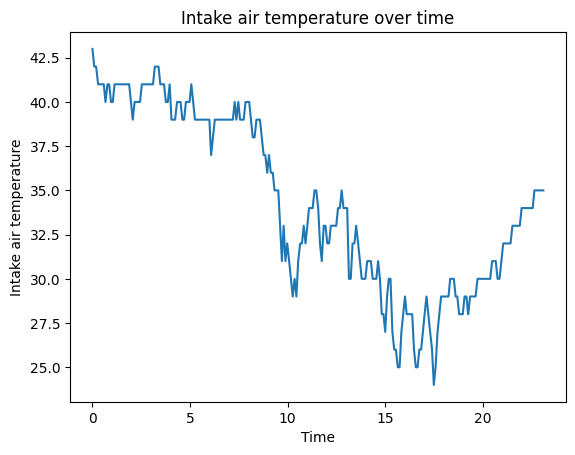

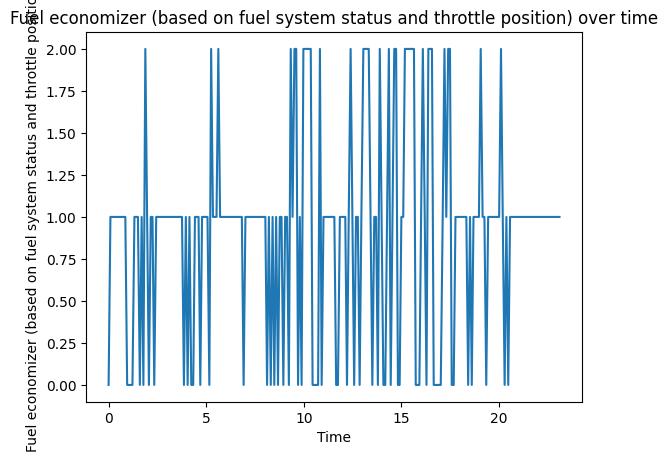

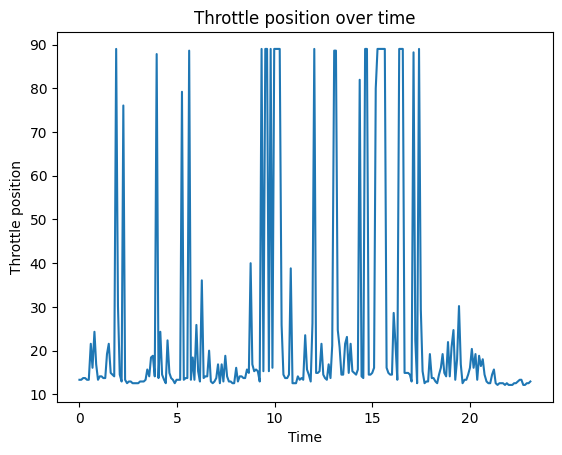

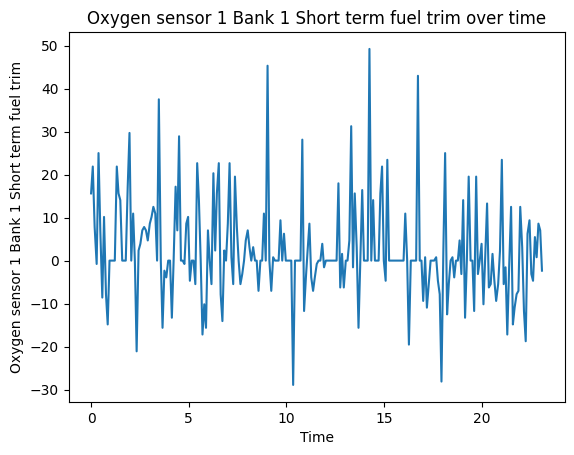

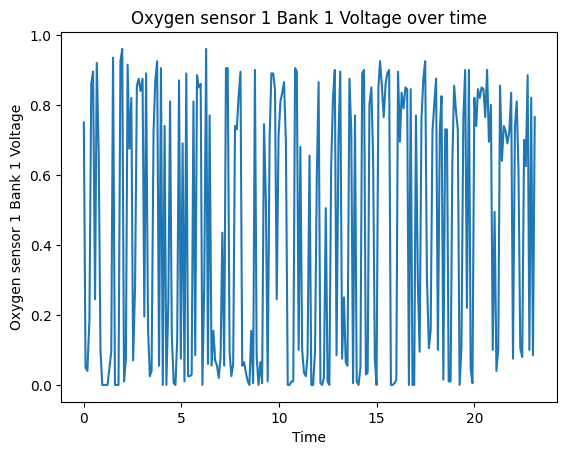

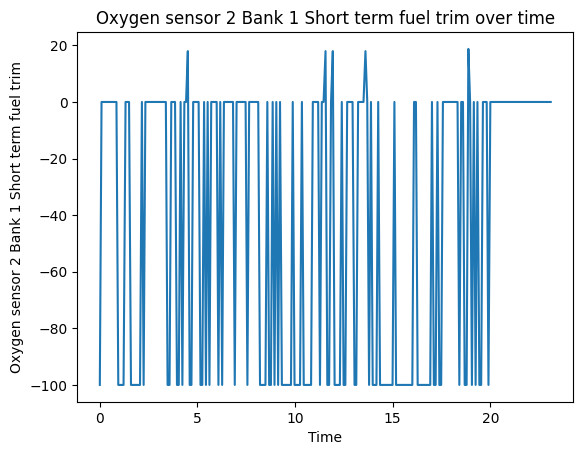

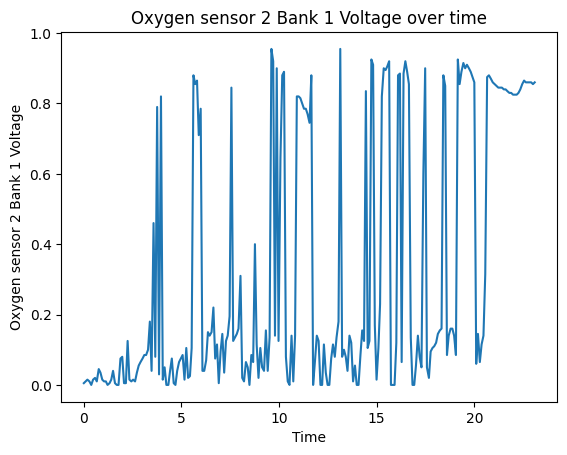

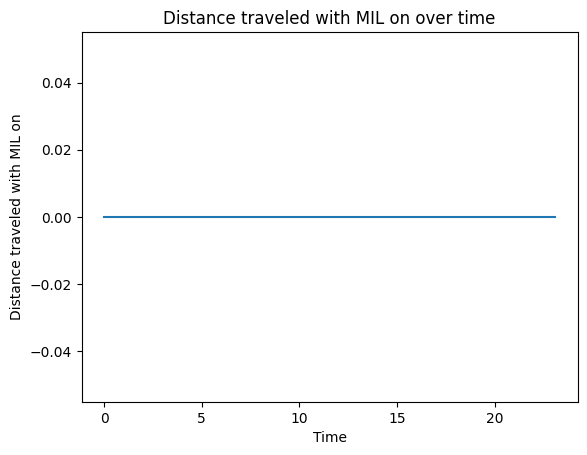

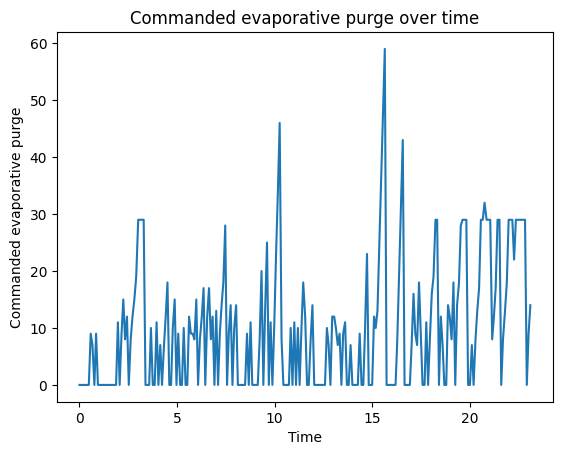

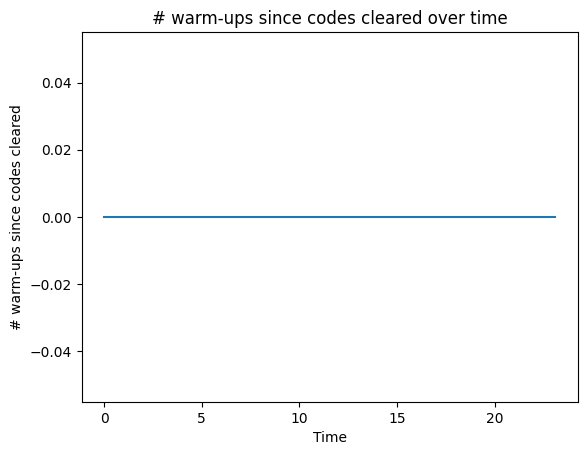

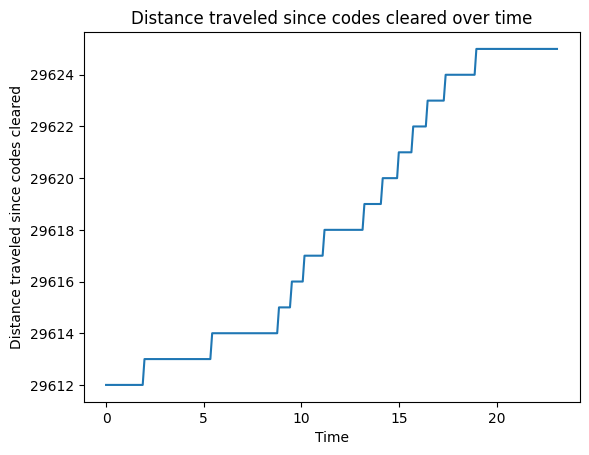

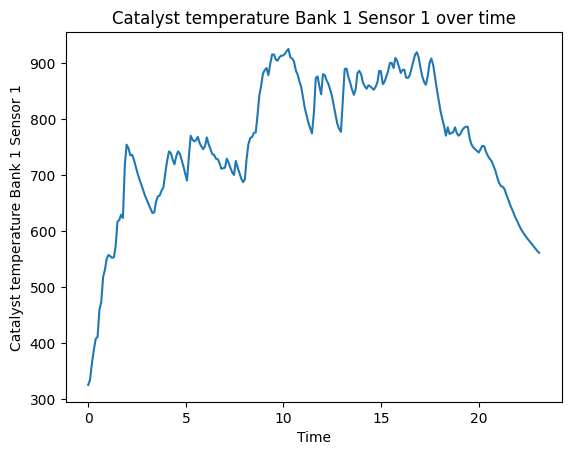

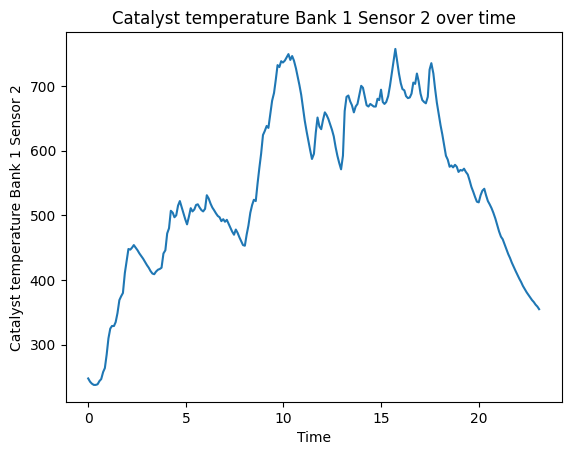

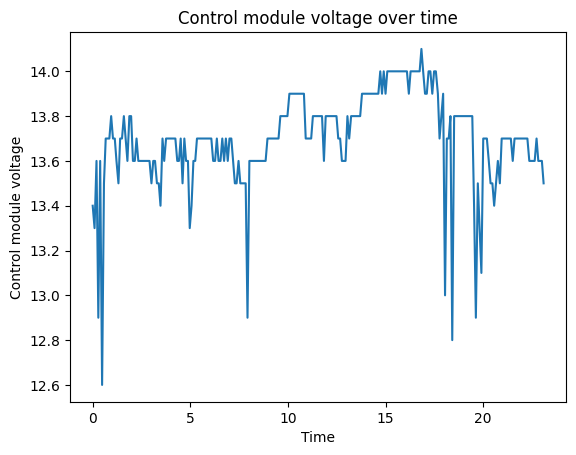

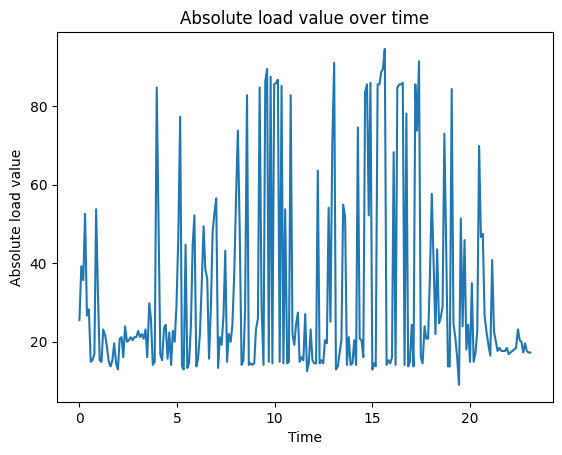

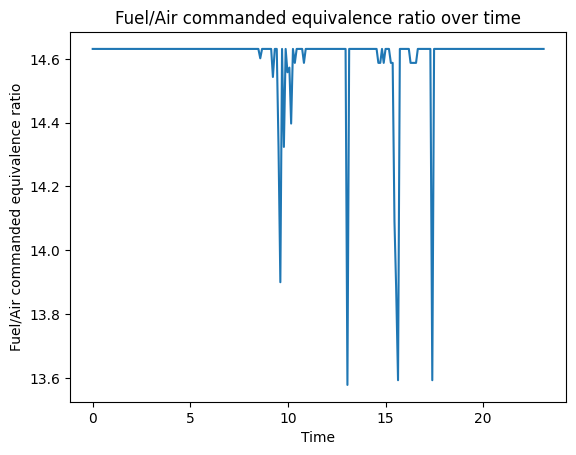

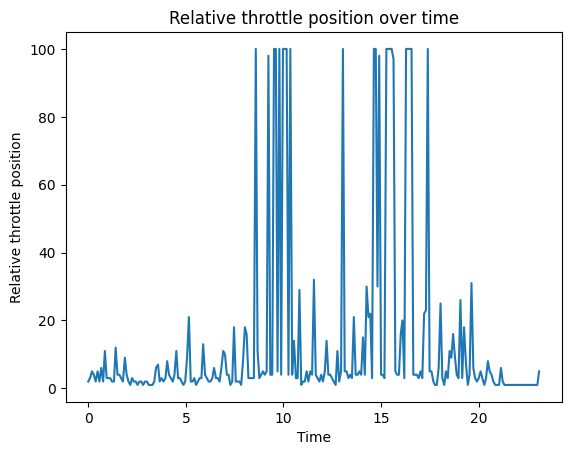

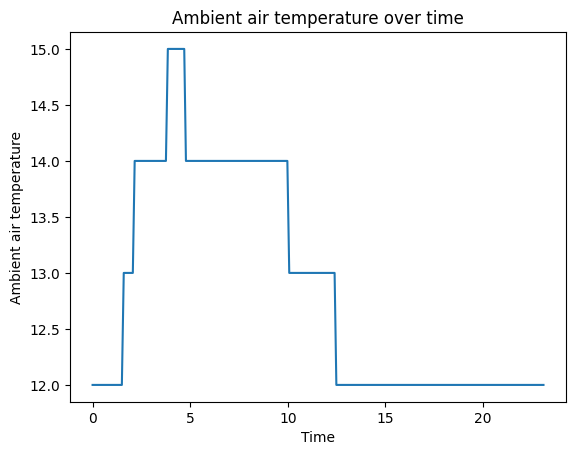

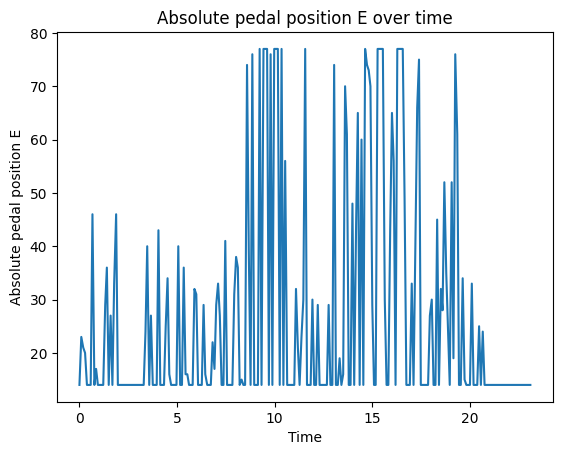

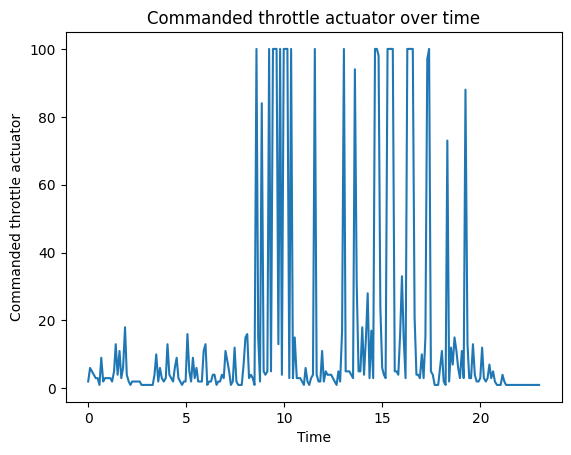

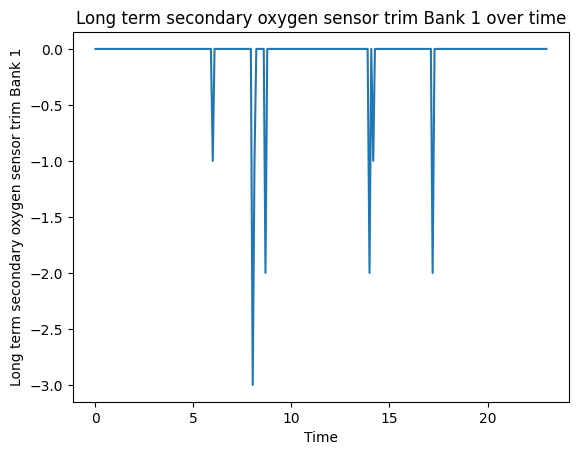

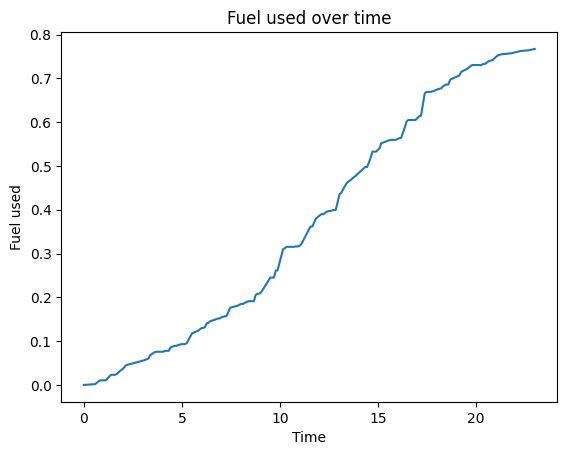

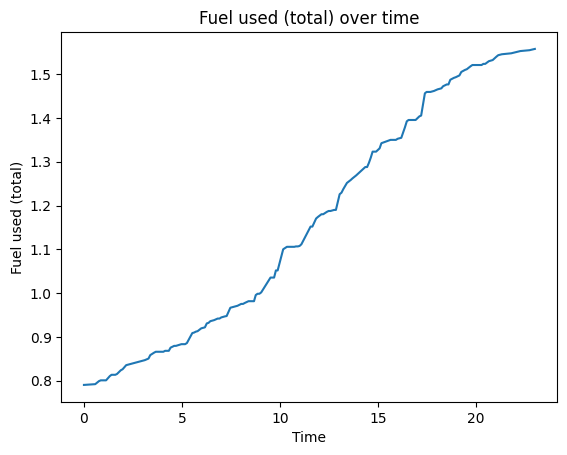

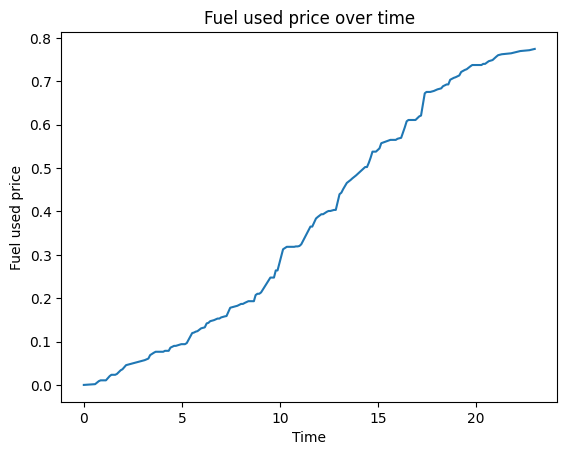

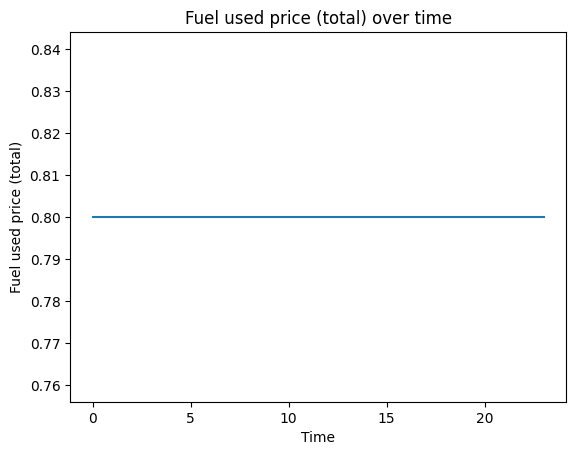

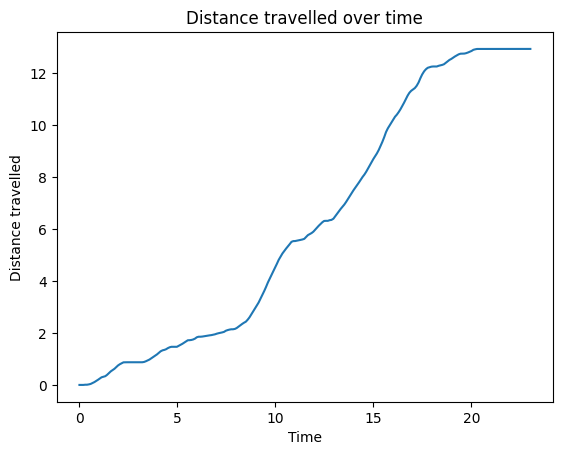

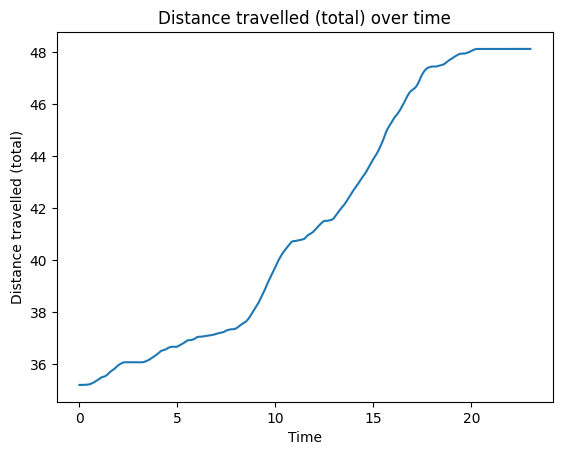

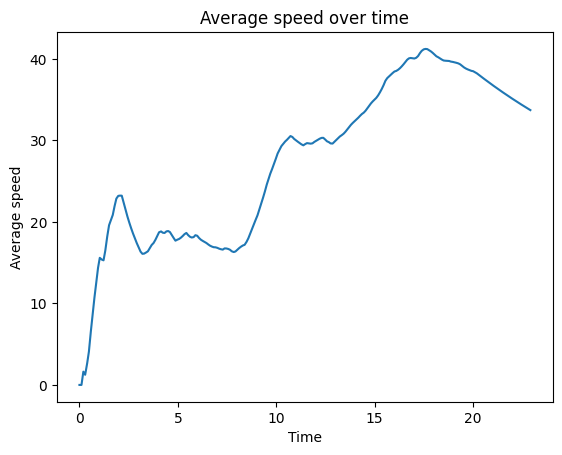

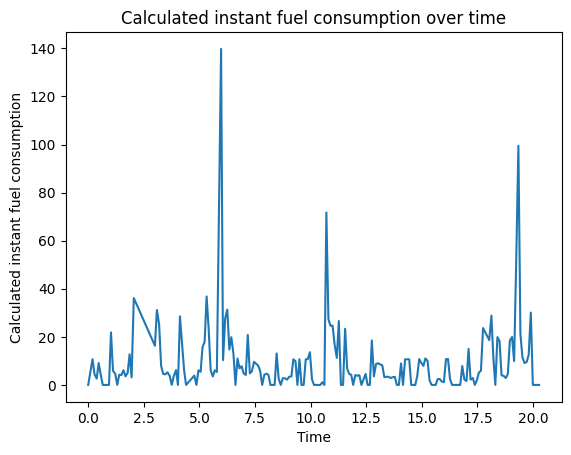

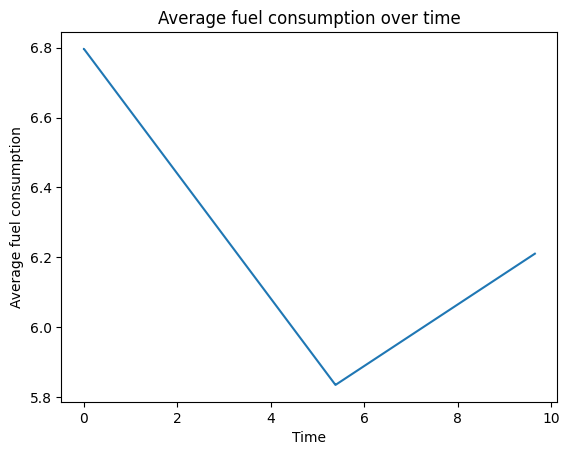

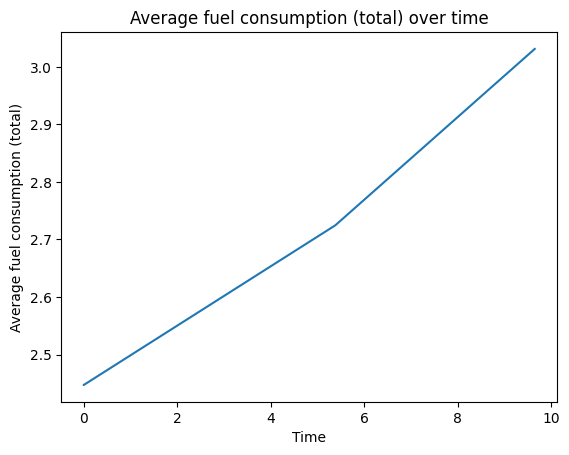

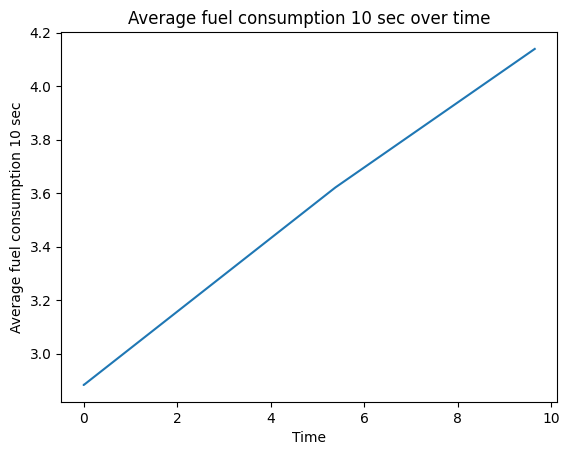

In [7]:
#create graphs for all PID values, normalize time to 0 for each PID
for i in PID:
    
    df = pd.DataFrame(PID_dict[i])
    plt.plot((PID_dict[i].index - PID_dict[i].index[0])/60, PID_dict[i].values, label=i)
    plt.xlabel('Time')
    plt.ylabel(i)
    plt.title(i + ' over time')
    plt.show()

In [8]:
#draw interactive plots using plotly

import plotly.express as px

for i in PID:
    df = pd.DataFrame(PID_dict[i]).reset_index()
    df.columns = ['SECONDS', 'VALUE']
    fig = px.line(df, x='SECONDS', y='VALUE', title=i + ' over time')
    fig.show()